# HW3

## Part One

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('attribution_allocation_student_data.csv')
data['channels'] = None
# Put the different channels into a list
for i in range(0,len(data)):
    data['channels'][i] = data.loc[i,'touch1':'touch5'].values.tolist()
print(data)

<ipython-input-2-bd19e355ec3c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['channels'][i] = data.loc[i,'touch1':'touch5'].values.tolist()


       convert_TF    touch1    touch2    touch3    touch4 touch5  tier  \
0            True     email  referral  referral       NaN    NaN     1   
1            True  referral  referral     email       NaN    NaN     1   
2            True  referral       NaN       NaN       NaN    NaN     1   
3            True     email       NaN       NaN       NaN    NaN     1   
4            True  referral  referral    social  referral    NaN     1   
...           ...       ...       ...       ...       ...    ...   ...   
68119       False    direct       NaN       NaN       NaN    NaN     3   
68120       False    direct     email  referral       NaN    NaN     3   
68121       False    direct  referral       NaN       NaN    NaN     3   
68122       False     email    direct       NaN       NaN    NaN     3   
68123       False    direct  referral    social       NaN    NaN     3   

                                          channels  
0            [email, referral, referral, nan, nan]  
1    

In [3]:
# Delete not converted customers
converted_full = data.loc[data['convert_TF'] == True]
converted = converted_full['channels']
converted

0                    [email, referral, referral, nan, nan]
1                    [referral, referral, email, nan, nan]
2                           [referral, nan, nan, nan, nan]
3                              [email, nan, nan, nan, nan]
4              [referral, referral, social, referral, nan]
                               ...                        
60648                  [referral, referral, nan, nan, nan]
60649        [referral, referral, referral, referral, nan]
68103    [organic_search, referral, referral, referral,...
68104                  [referral, referral, nan, nan, nan]
68117                    [direct, referral, nan, nan, nan]
Name: channels, Length: 13779, dtype: object

### Last non-direct click

In [4]:
social = 0
referral = 0
email = 0
paid_search = 0
display = 0

total_converted = len(converted)

for c in converted:
    for i in range(1,6):
        try:
            np.isnan(c[-i])
        except:
            if c[-i] != ('direct' or 'organic_search'):
                if c[-i] == 'social':
                    social += 1
                elif c[-i] == 'referral':
                    referral += 1
                elif c[-i] == 'email':
                    email += 1
                elif c[-i] == 'paid_search':
                    paid_search += 1
                elif c[-i] == 'display':
                    display += 1
                break

print('Count for different channels:')
print('social:%d\nreferral:%d\nemail:%d\npaid_search:%d\ndisplay:%d\n' % (social,referral,email,paid_search,display))
print('Percentages for different channels:')
print('social:%.2f%%\nreferral:%.2f%%\nemail:%.2f%%\npaid_search:%.2f%%\ndisplay:%.2f%%' 
      % (social/total_converted*100,referral/total_converted*100,email/total_converted*100,paid_search/total_converted*100,display/total_converted*100))

Count for different channels:
social:2948
referral:5984
email:1517
paid_search:1004
display:2314

Percentages for different channels:
social:21.39%
referral:43.43%
email:11.01%
paid_search:7.29%
display:16.79%


### Linear Model

In [5]:
# Calculate the number of channels(discard NaN)
def number_of_channels(list):
    count = 0
    for l in list:
        try:
            np.isnan(l)
            count += 1
        except:
            continue
    return(5-count)

In [6]:
social_socre1 = 0
organic_search_score1 = 0
referral_socre1 = 0
email_socre1 = 0
paid_search_socre1 = 0
display_socre1 = 0
direct_score1 = 0

for c in converted:
    weight = 1/number_of_channels(c)
    n = number_of_channels(c)
    for i in range(0,n):
        if c[i] == 'social':
            social_socre1 += weight
        elif c[i] == 'organic_search':
            organic_search_score1 += weight
        elif c[i] == 'referral':
            referral_socre1 += weight
        elif c[i] == 'email':
            email_socre1 += weight
        elif c[i] == 'paid_search':
            paid_search_socre1 += weight
        elif c[i] == 'display':
            display_socre1 += weight
        elif c[i] == 'direct':
            direct_score1 += weight

print('Scores for different channels:')
print('social:%.2f\norganic_search:%.2f\nreferral:%.2f\nemail:%.2f\npaid_search:%.2f\ndisplay:%.2f\ndirect:%.2f\n'
      % (social_socre1,organic_search_score1,referral_socre1,email_socre1,paid_search_socre1,display_socre1,direct_score1))

Scores for different channels:
social:2291.48
organic_search:10.83
referral:7470.57
email:1257.85
paid_search:707.98
display:2031.33
direct:8.95



### Position Based

In [7]:
name = ['social', 'organic_search', 'referral', 'email', 'paid_search', 'display', 'direct']
count = [0,0,0,0,0,0,0]

def channel_index(string):
    name = ['social', 'organic_search', 'referral', 'email', 'paid_search', 'display', 'direct']
    index = name.index(string)
    return index

In [8]:
for c in converted:
    if number_of_channels(c) == 5:
        ci = channel_index(c[0])
        count[ci] += 0.4
        ci = channel_index(c[1])
        count[ci] += (0.2/3)
        ci = channel_index(c[2])
        count[ci] += (0.2/3)
        ci = channel_index(c[3])
        count[ci] += (0.2/3)
        ci = channel_index(c[4])
        count[ci] += 0.4
    elif number_of_channels(c) == 4:
        ci = channel_index(c[0])
        count[ci] += 0.4
        ci = channel_index(c[1])
        count[ci] += 0.1
        ci = channel_index(c[2])
        count[ci] += 0.1
        ci = channel_index(c[3])
        count[ci] += 0.4
    elif number_of_channels(c) == 3:
        ci = channel_index(c[0])
        count[ci] += 0.4
        ci = channel_index(c[1])
        count[ci] += 0.2
        ci = channel_index(c[2])
        count[ci] += 0.4
    elif number_of_channels(c) == 2:
        ci = channel_index(c[0])
        count[ci] += 0.5
        ci = channel_index(c[1])
        count[ci] += 0.5
    elif number_of_channels(c) == 1:
        ci = channel_index(c[0])
        count[ci] += 1

social_socre2 = count[0]
organic_search_score2 = count[1]
referral_socre2 = count[2]
email_socre2 = count[3]
paid_search_socre2 = count[4]
display_socre2 = count[5]
direct_score2 = count[6]

      
print('Scores for different channels:')
print('social:%.2f\norganic_search:%.2f\nreferral:%.2f\nemail:%.2f\npaid_search:%.2f\ndisplay:%.2f\ndirect:%.2f\n'
      % (social_socre2,organic_search_score2,referral_socre2,email_socre2,paid_search_socre2,display_socre2,direct_score2))

Scores for different channels:
social:2452.53
organic_search:10.40
referral:7085.37
email:1326.43
paid_search:781.93
display:2113.53
direct:8.80



### CAC

In [9]:
tier1 = converted_full.loc[converted_full['tier'] == 1]['channels']
tier2 = converted_full.loc[converted_full['tier'] == 2]['channels']
tier3 = converted_full.loc[converted_full['tier'] == 3]['channels']

In [10]:
# Calculate the number of channels(discard NaN)
def number_of_channels(list):
    count = 0
    for l in list:
        try:
            np.isnan(l)
            count += 1
        except:
            continue
    return(5-count)

In [11]:
name = ['social', 'organic_search', 'referral', 'email', 'paid_search', 'display', 'direct']
count = [0,0,0,0,0,0,0]

def channel_index(string):
    name = ['social', 'organic_search', 'referral', 'email', 'paid_search', 'display', 'direct']
    index = name.index(string)
    return index


#### Tier 1

In [12]:
count1 = [0,0,0,0,0,0,0]

for c in tier1:
    if number_of_channels(c) == 5:
        ci = channel_index(c[0])
        count1[ci] += 1
        ci = channel_index(c[1])
        count1[ci] += 1
        ci = channel_index(c[2])
        count1[ci] += 1
        ci = channel_index(c[3])
        count1[ci] += 1
        ci = channel_index(c[4])
        count1[ci] += 1
    elif number_of_channels(c) == 4:
        ci = channel_index(c[0])
        count1[ci] += 1
        ci = channel_index(c[1])
        count1[ci] += 1
        ci = channel_index(c[2])
        count1[ci] += 1
        ci = channel_index(c[3])
        count1[ci] += 1
    elif number_of_channels(c) == 3:
        ci = channel_index(c[0])
        count1[ci] += 1
        ci = channel_index(c[1])
        count1[ci] += 1
        ci = channel_index(c[2])
        count1[ci] += 1
    elif number_of_channels(c) == 2:
        ci = channel_index(c[0])
        count1[ci] += 1
        ci = channel_index(c[1])
        count1[ci] += 1
    elif number_of_channels(c) == 1:
        ci = channel_index(c[0])
        count1[ci] += 1

spend1 = 1000        

CAC_social1 = spend1/count1[0]
CAC_organic_search1 = 0
CAC_referral1 = spend1/count1[2]
CAC_email1 = spend1/count1[3]
CAC_paid_search1 = spend1/count1[4]
CAC_display1 = spend1/count1[5]
CAC_direct1 = 0

print(count1)      
print('CAC for different channels in Tier 1:')
print('social:%.2f\norganic_search:%.2f\nreferral:%.2f\nemail:%.2f\npaid_search:%.2f\ndisplay:%.2f\ndirect:%.2f\n'
      % (CAC_social1,CAC_organic_search1,CAC_referral1,CAC_email1,CAC_paid_search1,CAC_display1,CAC_direct1))

[1320, 9, 4584, 678, 349, 1292, 4]
CAC for different channels in Tier 1:
social:0.76
organic_search:0.00
referral:0.22
email:1.47
paid_search:2.87
display:0.77
direct:0.00



#### Tier 2

In [13]:
count2 = [0,0,0,0,0,0,0]
for c in tier2:
    if number_of_channels(c) == 5:
        ci = channel_index(c[0])
        count2[ci] += 1
        ci = channel_index(c[1])
        count2[ci] += 1
        ci = channel_index(c[2])
        count2[ci] += 1
        ci = channel_index(c[3])
        count2[ci] += 1
        ci = channel_index(c[4])
        count2[ci] += 1
    elif number_of_channels(c) == 4:
        ci = channel_index(c[0])
        count2[ci] += 1
        ci = channel_index(c[1])
        count2[ci] += 1
        ci = channel_index(c[2])
        count2[ci] += 1
        ci = channel_index(c[3])
        count2[ci] += 1
    elif number_of_channels(c) == 3:
        ci = channel_index(c[0])
        count2[ci] += 1
        ci = channel_index(c[1])
        count2[ci] += 1
        ci = channel_index(c[2])
        count2[ci] += 1
    elif number_of_channels(c) == 2:
        ci = channel_index(c[0])
        count2[ci] += 1
        ci = channel_index(c[1])
        count2[ci] += 1
    elif number_of_channels(c) == 1:
        ci = channel_index(c[0])
        count2[ci] += 1

spend2 = 2000        

CAC_social2 = spend2/count2[0]
CAC_organic_search2 = 0
CAC_referral2 = spend2/count2[2]
CAC_email2 = spend2/count2[3]
CAC_paid_search2 = spend2/count2[4]
CAC_display2 = spend2/count2[5]
CAC_direct2 = 0

print(count2)      
print('CAC for different channels in Tier 2:')
print('social:%.2f\norganic_search:%.2f\nreferral:%.2f\nemail:%.2f\npaid_search:%.2f\ndisplay:%.2f\ndirect:%.2f\n'
      % (CAC_social2,CAC_organic_search2,CAC_referral2,CAC_email2,CAC_paid_search2,CAC_display2,CAC_direct2))

[2263, 11, 8220, 1182, 649, 2014, 4]
CAC for different channels in Tier 2:
social:0.88
organic_search:0.00
referral:0.24
email:1.69
paid_search:3.08
display:0.99
direct:0.00



#### Tier 3

In [14]:
count3 = [0,0,0,0,0,0,0]
for c in tier3:
    if number_of_channels(c) == 5:
        ci = channel_index(c[0])
        count3[ci] += 1
        ci = channel_index(c[1])
        count3[ci] += 1
        ci = channel_index(c[2])
        count3[ci] += 1
        ci = channel_index(c[3])
        count3[ci] += 1
        ci = channel_index(c[4])
        count3[ci] += 1
    elif number_of_channels(c) == 4:
        ci = channel_index(c[0])
        count3[ci] += 1
        ci = channel_index(c[1])
        count3[ci] += 1
        ci = channel_index(c[2])
        count3[ci] += 1
        ci = channel_index(c[3])
        count3[ci] += 1
    elif number_of_channels(c) == 3:
        ci = channel_index(c[0])
        count3[ci] += 1
        ci = channel_index(c[1])
        count3[ci] += 1
        ci = channel_index(c[2])
        count3[ci] += 1
    elif number_of_channels(c) == 2:
        ci = channel_index(c[0])
        count3[ci] += 1
        ci = channel_index(c[1])
        count3[ci] += 1
    elif number_of_channels(c) == 1:
        ci = channel_index(c[0])
        count3[ci] += 1

spend3 = 3000        

CAC_social3 = spend3/count3[0]
CAC_organic_search3 = 0
CAC_referral3 = spend3/count3[2]
CAC_email3 = spend3/count3[3]
CAC_paid_search3 = spend3/count3[4]
CAC_display3 = spend3/count3[5]
CAC_direct3 = 0

print(count3)      
print('CAC for different channels in Tier 3:')
print('social:%.2f\norganic_search:%.2f\nreferral:%.2f\nemail:%.2f\npaid_search:%.2f\ndisplay:%.2f\ndirect:%.2f\n'
      % (CAC_social3,CAC_organic_search3,CAC_referral3,CAC_email3,CAC_paid_search3,CAC_display3,CAC_direct3))

[2738, 17, 9939, 1617, 875, 2420, 14]
CAC for different channels in Tier 3:
social:1.10
organic_search:0.00
referral:0.30
email:1.86
paid_search:3.43
display:1.24
direct:0.00



In [25]:
count_all = [count1[i]+count2[i]+count3[i] for i in range(0,len(count1))]
print(count_all)

[6321, 37, 22743, 3477, 1873, 5726, 22]


In [29]:
CAC_average = [0,0,0,0,0,0,0]
all_spend = (spend1+spend2+spend3)
for i in [0,2,3,4,5]:
    CAC_average[i] = all_spend/(count1[i]+ count2[i]+ count3[i])
CAC_average

[0.9492168960607499,
 0,
 0.2638174383326738,
 1.7256255392579811,
 3.203416978109984,
 1.0478519035976248,
 0]

### Observations

|    | spend | social | organic_search | referral | email | paid_search | display | direct |
|:-----:|:----:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| Tier 1 | 1000 | 0.76 | 0 | 0.22 | 1.47 | 2.87 | 0.77 | 0 |
| Tier 2 | 2000 | 0.88 | 0 | 0.24 | 1.69 | 3.08 | 0.99 | 0 |
| Tier 3 | 3000 | 1.10 | 0 | 0.30 | 1.86 | 3.43 | 1.24 | 0 |
| Average |     | 0.95 | 0 | 0.26 | 1.73 | 3.20 | 1.05 | 0 |

1. Paid search is the most expensive channel.
2. Referral is the least expensive channel.
3. When the channels are fixed, the more you spend, the higher CAC you will get.

## Part Two

### Marginal CAC Calculation

In [83]:
marginal_social1 = 1000/(count1[0])
marginal_social2 = 1000/(count2[0]-count1[0])
marginal_social3 = 1000/(count3[0]-count2[0])
print('Marginal CAC for Social Channel:')
print('marginal_social1: %.2f\nmarginal_social2: %.2f\nmarginal_social3: %.2f\n' 
      % (marginal_social1,marginal_social2,marginal_social3))

Marginal CAC for Social Channel:
marginal_social1: 0.76
marginal_social2: 1.06
marginal_social3: 2.11



In [84]:
marginal_referral1 = 1000/(count1[2])
marginal_referral2 = 1000/(count2[2]-count1[2])
marginal_referral3 = 1000/(count3[2]-count2[2])
print('Marginal CAC for Referral Channel:')
print('marginal_referral1: %.2f\nmarginal_referral2: %.2f\nmarginal_referral3: %.2f\n' 
      % (marginal_referral1,marginal_referral2,marginal_referral3))

Marginal CAC for Referral Channel:
marginal_referral1: 0.22
marginal_referral2: 0.28
marginal_referral3: 0.58



In [85]:
marginal_email1 = 1000/(count1[3])
marginal_email2 = 1000/(count2[3]-count1[3])
marginal_email3 = 1000/(count3[3]-count2[3])
print('Marginal CAC for Email Channel:')
print('marginal_email1: %.2f\nmarginal_email2: %.2f\nmarginal_email3: %.2f\n' 
      % (marginal_email1,marginal_email2,marginal_email3))

Marginal CAC for Email Channel:
marginal_email1: 1.47
marginal_email2: 1.98
marginal_email3: 2.30



In [87]:
marginal_paid_search1 = 1000/(count1[4])
marginal_paid_search2 = 1000/(count2[4]-count1[4])
marginal_paid_search3 = 1000/(count3[4]-count2[4])
print('Marginal CAC for Paid-Search Channel:')
print('marginal_paid_search1: %.2f\nmarginal_paid_search2: %.2f\nmarginal_paid_search3: %.2f\n' 
      % (marginal_paid_search1,marginal_paid_search2,marginal_paid_search3))

Marginal CAC for Paid-Search Channel:
marginal_paid_search1: 2.87
marginal_paid_search2: 3.33
marginal_paid_search3: 4.42



In [88]:
marginal_paid_display1 = 1000/(count1[5])
marginal_paid_display2 = 1000/(count2[5]-count1[5])
marginal_paid_display3 = 1000/(count3[5]-count2[5])
print('Marginal CAC for Display Channel:')
print('marginal_paid_display1: %.2f\nmarginal_paid_display2: %.2f\nmarginal_paid_display3: %.2f\n' 
      % (marginal_paid_display1,marginal_paid_display2,marginal_paid_display3))

Marginal CAC for Display Channel:
marginal_paid_display1: 0.77
marginal_paid_display2: 1.39
marginal_paid_display3: 2.46



|    | marginal spend | social | referral | email | paid_search | display |
|:-----:|:----:|:----------:|:----------:|:----------:|:----------:|:----------:|
| Tier 1 | 1000 | 0.76 | 0.22 | 1.47 | 2.87 | 0.77 |
| Tier 2 | 1000 | 1.06 | 0.28 | 1.98 | 3.33 | 1.39 |
| Tier 3 | 1000 | 2.11 | 0.58 | 2.30 | 4.42 | 2.46 |

### How to spend the budget - Position Based Method

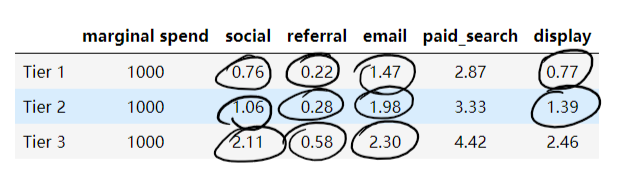

Based on the Position Based method, we conclude that Social and Referral Channnels with the highest contribution weight should have priority in budget spending.

Also, using the strategy we learnt in class, we came to the conclusion that we should spend 3000 dollars on Social Channel, 3000 dollars on Referral Channel, 3000 dollars on Email Channel, and 2000 dollars on Display Channel. Which also satisfied the Position Based Method to choose.